In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import decomposition

In [2]:
iris = pd.read_csv("Iris.csv")
iris.drop('Id', axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
X = iris.iloc[:, :-1]
Y = iris.iloc[:, -1]

print(X[0:10])
print(Y[0:10])

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
5            5.4           3.9            1.7           0.4
6            4.6           3.4            1.4           0.3
7            5.0           3.4            1.5           0.2
8            4.4           2.9            1.4           0.2
9            4.9           3.1            1.5           0.1
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object


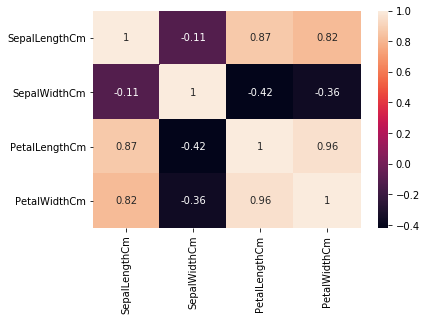

In [5]:
plt.figure(figsize=(6,4))
ax = sns.heatmap(iris.corr().round(2), annot = True)
plt.show()

<Figure size 576x576 with 0 Axes>

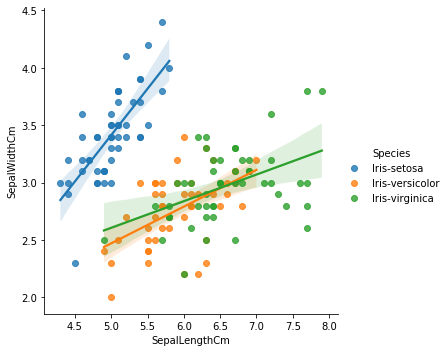

<Figure size 432x288 with 0 Axes>

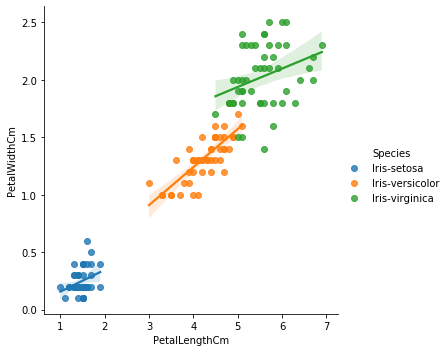

In [6]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.clf()
sns.lmplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", fit_reg=True, hue='Species')
plt.show()

plt.subplot(1,2,2)
plt.clf()
sns.lmplot(data=iris, x="PetalLengthCm", y="PetalWidthCm", fit_reg=True, hue='Species')
plt.show()

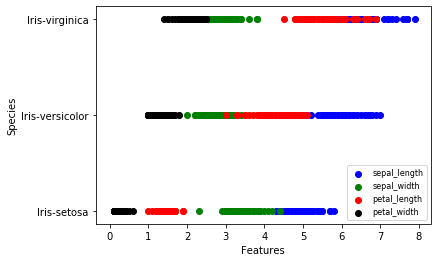

In [7]:
plt.xlabel('Features')
plt.ylabel('Species')

pltX = iris.loc[:, 'SepalLengthCm']
pltY = iris.loc[:,'Species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = iris.loc[:, 'SepalWidthCm']
pltY = iris.loc[:,'Species']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = iris.loc[:, 'PetalLengthCm']
pltY = iris.loc[:,'Species']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = iris.loc[:, 'PetalWidthCm']
pltY = iris.loc[:,'Species']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
predictions = model.predict(X_test)
print(predictions)


print("\n", classification_report(Y_test, predictions) )

print( accuracy_score(Y_test, predictions))

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica']

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

1.0


In [10]:
df1 = pd.DataFrame()
df1['SepalLengthCm'] = X_test['SepalLengthCm']
df1['SepalWidthCm'] = X_test['SepalWidthCm']
df1['PetalLengthCm'] = X_test['PetalLengthCm']
df1['PetalWidthCm'] = X_test['PetalWidthCm']
df1['Species-Original'] = Y_test

df2 = pd.DataFrame()
df2['SepalLengthCm'] = X_test['SepalLengthCm']
df2['SepalWidthCm'] = X_test['SepalWidthCm']
df2['PetalLengthCm'] = X_test['PetalLengthCm']
df2['PetalWidthCm'] = X_test['PetalWidthCm']
df2['Species-Predicted'] = predictions

print(df1.head())
print(df2.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species-Original
87             6.3           2.3            4.4           1.3  Iris-versicolor
111            6.4           2.7            5.3           1.9   Iris-virginica
10             5.4           3.7            1.5           0.2      Iris-setosa
91             6.1           3.0            4.6           1.4  Iris-versicolor
49             5.0           3.3            1.4           0.2      Iris-setosa
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
87             6.3           2.3            4.4           1.3   
111            6.4           2.7            5.3           1.9   
10             5.4           3.7            1.5           0.2   
91             6.1           3.0            4.6           1.4   
49             5.0           3.3            1.4           0.2   

    Species-Predicted  
87    Iris-versicolor  
111    Iris-virginica  
10        Iris-setosa  
91    Iris-versicolor  
49        Iris-

<Figure size 432x288 with 0 Axes>

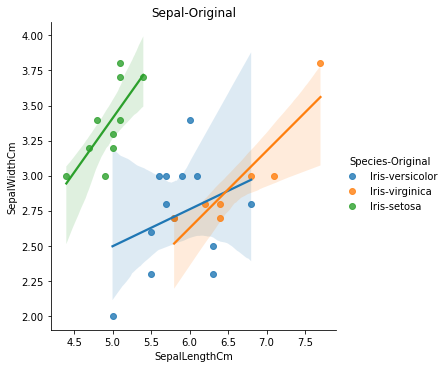

<Figure size 432x288 with 0 Axes>

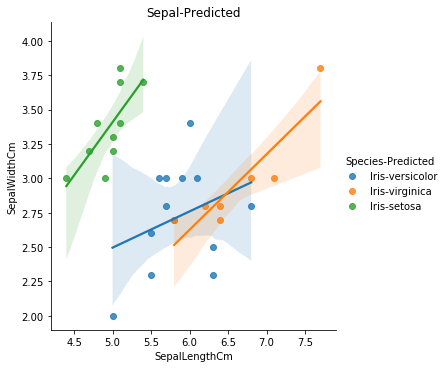

<Figure size 432x288 with 0 Axes>

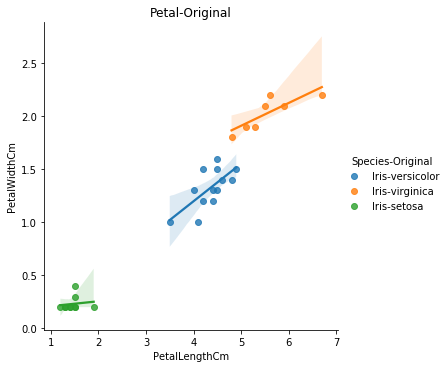

<Figure size 432x288 with 0 Axes>

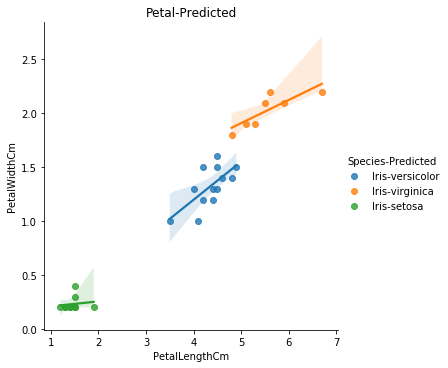

In [11]:
plt.figure(figsize=(6,4))

plt.subplot(2,2,1)
plt.clf()
sns.lmplot(data=df1, x="SepalLengthCm", y="SepalWidthCm", fit_reg=True, hue='Species-Original')
plt.title('Sepal-Original')
plt.show()

plt.subplot(2,2,1)
plt.clf()
sns.lmplot(data=df2, x="SepalLengthCm", y="SepalWidthCm", fit_reg=True, hue='Species-Predicted')
plt.title('Sepal-Predicted')
plt.show()

plt.subplot(2,2,2)
plt.clf()
sns.lmplot(data=df1, x="PetalLengthCm", y="PetalWidthCm", fit_reg=True, hue='Species-Original')
plt.title('Petal-Original')
plt.show()

plt.subplot(2,2,2)
plt.clf()
sns.lmplot(data=df2, x="PetalLengthCm", y="PetalWidthCm", fit_reg=True, hue='Species-Predicted')
plt.title('Petal-Predicted')
plt.show()

In [12]:
####### PCA ########

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)
X_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [13]:
pca = decomposition.PCA(n_components = 2)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)

In [14]:
dfpc = pd.DataFrame(X_pca_array, columns=['PC1', 'PC2'])
dfpc['Species'] = Y
dfpc.head()

,PC1,PC2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


<Figure size 576x576 with 0 Axes>

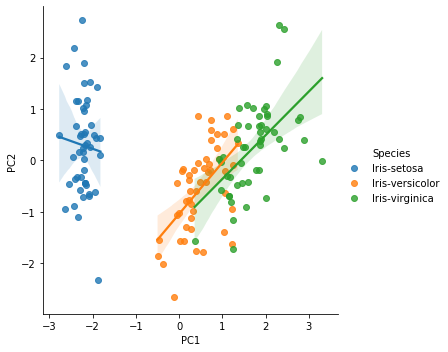

In [15]:
plt.figure(1, figsize=(8,8))
plt.clf()
sns.lmplot(data=dfpc, x="PC1", y="PC2", fit_reg=True, hue='Species')
plt.show()

In [16]:
X = dfpc.iloc[:, 0:2]
Y = dfpc.iloc[:, -1]

print(X)
print(Y)

          PC1       PC2
0   -2.264542  0.505704
1   -2.086426 -0.655405
2   -2.367950 -0.318477
3   -2.304197 -0.575368
4   -2.388777  0.674767
..        ...       ...
145  1.870522  0.382822
146  1.558492 -0.905314
147  1.520845  0.266795
148  1.376391  1.016362
149  0.959299 -0.022284

[150 rows x 2 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
predictions = model.predict(X_test)
print(predictions)


print("\n", classification_report(Y_test, predictions) )

print( accuracy_score(Y_test, predictions))

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.77      0.87        13
 Iris-virginica       0.70      1.00      0.82         7

       accuracy                           0.90        30
      macro avg       0.90      0.92      0.90        30
   weighted avg       0.93      0.90      0.90        30

0.9


In [19]:
df1 = pd.DataFrame()
df1['PC1'] = X_test['PC1']
df1['PC2'] = X_test['PC2']
df1['Species-Original'] = Y_test

df2 = pd.DataFrame()
df2['PC1'] = X_test['PC1']
df2['PC2'] = X_test['PC2']
df2['Species-Predicted'] = predictions

print(df1.head())
print(df2.head())

          PC1       PC2 Species-Original
87   1.035878 -1.392466  Iris-versicolor
111  1.599065 -0.428249   Iris-virginica
10  -2.163487  1.070596      Iris-setosa
91   0.623171  0.027543  Iris-versicolor
49  -2.205954  0.032238      Iris-setosa
          PC1       PC2 Species-Predicted
87   1.035878 -1.392466    Iris-virginica
111  1.599065 -0.428249    Iris-virginica
10  -2.163487  1.070596       Iris-setosa
91   0.623171  0.027543   Iris-versicolor
49  -2.205954  0.032238       Iris-setosa


<Figure size 432x288 with 0 Axes>

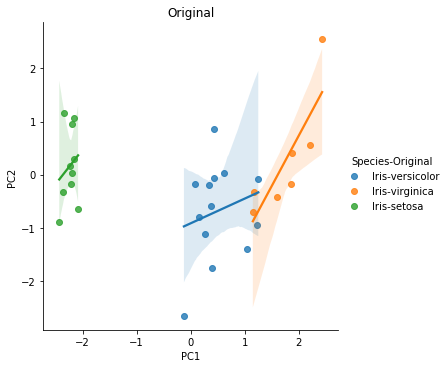

<Figure size 432x288 with 0 Axes>

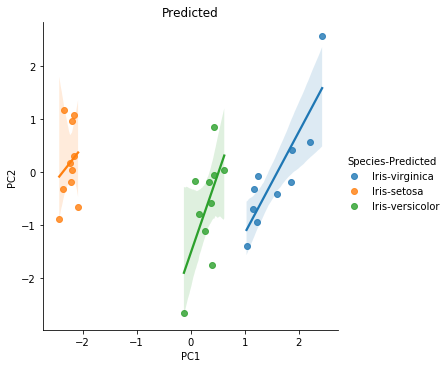

In [21]:
plt.figure(figsize=(6,4))

plt.subplot(2,2,1)
plt.clf()
sns.lmplot(data=df1, x="PC1", y="PC2", fit_reg=True, hue='Species-Original')
plt.title('Original')
plt.show()

plt.subplot(2,2,1)
plt.clf()
sns.lmplot(data=df2, x="PC1", y="PC2", fit_reg=True, hue='Species-Predicted')
plt.title('Predicted')
plt.show()

